In [4]:
import pandas as pd
f_train_query = open("C:\\Users\\79463\\Desktop\\source\\data2\\train.query.tsv", "r", encoding="utf-8")
f_train_reply = open("C:\\Users\\79463\\Desktop\\source\\data2\\train.reply.tsv", "r", encoding="utf-8")
data = []
for i in f_train_query.readlines():
    data.append([int(i.split("\t")[0]), i.split("\t")[1][:-1]])
train_query = pd.DataFrame(data, columns=["query_id", "query"])
data = []
for i in f_train_reply.readlines():
    data.append([int(i.split("\t")[0]), int(i.split("\t")[1]), i.split("\t")[2], int(i.split("\t")[3][:-1])])
train_reply = pd.DataFrame(data, columns=["query_id", "reply_id", "reply_content", "label"])
train = pd.merge(train_query, train_reply, on="query_id")
train_df = pd.DataFrame()
train_df['问题'] = train[train["label"]==1]['query']+train[train["label"]==1]['reply_content']
train_df.head(10)

,问题
0,采荷一小是分校吧杭州市采荷第一小学钱江苑校区，杭州市钱江新城实验学校。
9,你们的佣金费大约是多少和契税是多少。所有费用下来654万
10,你们的佣金费大约是多少和契税是多少。包含着税费和我们的服务费和房款
14,靠近川沙路嘛？有一点靠近川沙路
16,这套房源价格还有优惠空间吗？有
24,这套房源价格还有优惠空间么？价格周期可谈
27,有房子可以带我看看吗？宾至路有套82平方的
28,有房子可以带我看看吗？笋盘
29,有房子可以带我看看吗？可以带您看一下
30,光线不好，是吗光线非常好，友联花园都是可以


In [1]:
import pickle
import pandas as pd
question = pickle.load(open("C:\\Users\\79463\\Desktop\\阅读理解\\question.pkl","rb"))

train_df = pd.DataFrame(question)

In [2]:

corpus = train_df['Question'].tolist()

In [3]:
import jieba
seg_list = jieba.cut(corpus[0], cut_all=True)
print("【全模式】：" + "/ ".join(seg_list))  


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\79463\AppData\Local\Temp\jieba.cache
Loading model cost 0.535 seconds.
Prefix dict has been built successfully.


【全模式】：下列/ 对/ 这/ 首/ 诗/ 的/ 理解/ 和/ 赏析/ ，/ 不正/ 正确/ 的/ 一项/ 是


In [4]:
corpus_all = []
for corpus_temp in corpus:
    seg_list = jieba.cut(corpus_temp, cut_all=True)
    corpus_all.append(" ".join(seg_list))

In [5]:
corpus_all[0]

'下列 对 这 首 诗 的 理解 和 赏析 ， 不正 正确 的 一项 是'

In [6]:
import codecs
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
#将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(min_df=5)

#该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer()

#第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus_all))

#获取词袋模型中的所有词语  
word = vectorizer.get_feature_names()

#将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重
weight = tfidf.toarray()

len(word)

1082

Start Kmeans:
0
1
2
3
4
5
6
7
8
9


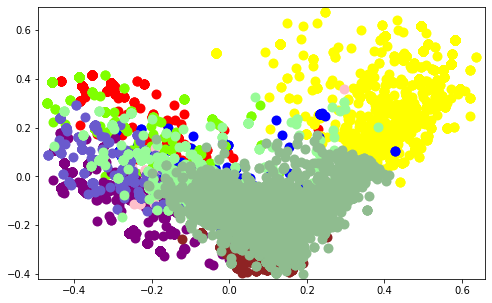

In [24]:
#打印特征向量文本内容
resName = "Tfidf_Result.txt"
result = codecs.open(resName, 'w', 'utf-8')
for j in range(len(word)):
    result.write(word[j] + ' ')
result.write('\r\n\r\n')

#每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重  
for i in range(len(weight)):
    for j in range(len(word)):
        result.write(str(weight[i][j]) + ' ')
    result.write('\r\n\r\n')
result.close()

print( 'Start Kmeans:')
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=10)   #科技 医学 汽车 国家
s = clf.fit(weight)

#每个样本所属的簇
label = []               
i = 1
while i <= len(clf.labels_):
    label.append(clf.labels_[i-1])
    i = i + 1

y_pred = clf.labels_

from sklearn.decomposition import PCA
pca = PCA(n_components=2)             #输出两维
newData = pca.fit_transform(weight)   #载入N维

xs, ys = newData[:, 0], newData[:, 1]
#设置颜色
cluster_colors = {0: 'r', 1: 'yellow', 2: 'b', 3: 'chartreuse', 4: 'purple', 5: '#FFC0CB', 6: '#6A5ACD', 7: '#98FB98',8:'#8E2323',9:'#8FBC8F'}

#设置类名
cluster_names = {0: u'类0', 1: u'类1',2: u'类2',3: u'类3',4: u'类4',5: u'类5',6: u'类6',7: u'类7',8:u'类7',9: u'类7'} 

df = pd.DataFrame(dict(x=xs, y=ys, label=y_pred, title=corpus)) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(8, 5)) # set size
ax.margins(0.02)
for name, group in groups:
    print(name)
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=cluster_names[name], color=cluster_colors[name], mec='none')

plt.show()

In [25]:
df.head()

,x,y,label,title
0,-0.051378,-0.068640,7,下列对这首诗的理解和赏析，不正确的一项是
1,0.158324,-0.291487,9,1. 文中“肆虐”“凋凌”“昼夜兼程”“版图”“稚嫩”“嫣然”“抱憾退出”的词语中，有错别字...
2,0.167011,-0.307024,9,依次选用文中括号里的词语，最恰当的一项是
3,-0.380725,-0.027398,4,下列对材料相关内容的理解，不正确的一项是
4,-0.434223,-0.048591,4,下列对材料相关内容的概括和分析，不正确的一项是


In [10]:
df=df.rename(columns={"title":'Question'})

In [31]:
p=pd.concat([df,train_df[['A','B','C','D']]],axis=1)
train_df[['A','B','C','D']]

,A,B,C,D
0,A．作者写作此诗之时，皮日休正患病居家，闭门谢客，与外界不通音讯。,B．由于友人患病，原有的约会被暂时搁置，作者游春的诗篇也未能写出。,C．作者虽然身在书斋从事教学，但心中盼望能走进自然，领略美好春光。,D．尾联使用了关于沈约的典故，可以由此推测皮日休所患的疾病是目疾。
1,A. 肆虐 凋凌,B. 集结 昼夜兼程,C. 版图 稚嫩,D. 嫣然 抱憾退出
2,A. 席卷 系 扩展,B. 笼罩 停 扩展,C. 席卷 停 扩充,D. 笼罩 系 扩充
3,A.量子通信把量子物理与信息技术结合起来，利用量子调控技术对信息进行编码、存储、传输和操纵，...,B.潘建伟研究团队在天宫二号空间站上进行太空量子实验，并计划发射“墨子号”后的第二颗卫星，他...,C.中国继美国、英国、日本之后成为第四个拥有散裂中子源设施的国家，有些日本科学家有了危机感，...,D.在基础科学研究领域，比如使用人造卫星开展科学实验，需要耗费巨额资金，欧洲和日本都还在犹豫...
4,A.利用“墨子号”科学实验卫星研究量子密钥发布和量子隐形形态的量子通信技术，对国家信息安全和...,B.量子密钥分发是通过量子态的传输，使双方共享无条件安全的量子密钥，对信息进行一次一密的严格...,C.考虑到千百年来人们对于通信安全的追求从未停止，市场潜力巨大，中国和欧洲都投入巨额资金，首...,D.材料二和材料三中，国外媒体对我国量子通信技术研究的相关情况进行了报道，认为中国无论是投资...
5,A．纯礼字彝叟/以父仲淹荫/知陵台令兼永安县/永昭陵建京西转运使/配木石砖甓及工徒于一路/独...,B．纯礼字彝叟/以父仲淹/荫知陵台令兼永安县/永昭陵建/京西转运使配木石砖甓及工徒于一路/独...,C．纯礼字彝叟/以父仲淹/荫知陵台令兼永安县/永昭陵建京西转运使/配木石砖甓及工徒于一路/独...,D．纯礼字彝叟/以父仲淹荫/知陵台令兼永安县/永昭陵建/京西转运使配木石砖甓及工徒于一路/独...
6,A．纯礼敢于抗言，受到韩琦赏识。主管官员分配劳赋不当，他有理有据地提出异议，认为永安县负责陵...,B．纯礼关怀下属，处分重在惩戒。他在遂州任上对下属宽厚，草场失火，守吏惶恐等候诛杀，库吏因盗...,C．纯礼鉴察往事，治事去苛从宽。在开封府任上，有村民被误告谋逆，他发现事实并非如此，认为应判...,D．纯礼坚毅刚直，不幸遭人算计。他的正直让曾布恐惧，曾挑唆驸马都尉王诜诬告纯礼，王即借纯礼宴...
7,A．古琴的缺点是音量小，这是很多人的看法,B．音量小作为古琴的一个缺点，被很多人所批评,C．音量小是古琴的一个缺点，很多人都是这么认为的,D．古琴音量小，很多人认为这是它的一个缺点
8,A．正因为古琴音量小，所以使得它是直接和你的心进行交流的最个人化的乐器。,B．正是古琴音量小，使得它是直接和你的心进行交流的乐器，是最个人化的乐器。,C．正是音量小，使得古琴成为直接和你的心进行交流的乐器，是最个人化的乐器。,D．正因为音量小，使得古琴成为直接和你的心进行交流的最个人化的乐器。
9,A．会座病/魏惠王亲往问病/公叔曰/公孙鞅年虽少有/奇才/愿王举国而听之/王即不听用鞅/必杀...,B．会座病/魏惠王亲往问病/公叔曰/公孙鞅年虽少/有奇才/愿王举国而听之/王即不听用鞅/必杀...,C．会座病/魏惠王亲往问病/公叔曰/公孙鞅年虽少/有奇才/愿王举国而听之/王即不听/用鞅必杀...,D．会座病/魏惠王亲往问病/公叔曰/公孙鞅年虽少/有奇才/愿王举国/而听之/王即不听用鞅/必...


In [32]:
p.head()

,x,y,label,title,A,B,C,D
0,-0.051378,-0.068640,7,下列对这首诗的理解和赏析，不正确的一项是,A．作者写作此诗之时，皮日休正患病居家，闭门谢客，与外界不通音讯。,B．由于友人患病，原有的约会被暂时搁置，作者游春的诗篇也未能写出。,C．作者虽然身在书斋从事教学，但心中盼望能走进自然，领略美好春光。,D．尾联使用了关于沈约的典故，可以由此推测皮日休所患的疾病是目疾。
1,0.158324,-0.291487,9,1. 文中“肆虐”“凋凌”“昼夜兼程”“版图”“稚嫩”“嫣然”“抱憾退出”的词语中，有错别字...,A. 肆虐 凋凌,B. 集结 昼夜兼程,C. 版图 稚嫩,D. 嫣然 抱憾退出
2,0.167011,-0.307024,9,依次选用文中括号里的词语，最恰当的一项是,A. 席卷 系 扩展,B. 笼罩 停 扩展,C. 席卷 停 扩充,D. 笼罩 系 扩充
3,-0.380725,-0.027398,4,下列对材料相关内容的理解，不正确的一项是,A.量子通信把量子物理与信息技术结合起来，利用量子调控技术对信息进行编码、存储、传输和操纵，...,B.潘建伟研究团队在天宫二号空间站上进行太空量子实验，并计划发射“墨子号”后的第二颗卫星，他...,C.中国继美国、英国、日本之后成为第四个拥有散裂中子源设施的国家，有些日本科学家有了危机感，...,D.在基础科学研究领域，比如使用人造卫星开展科学实验，需要耗费巨额资金，欧洲和日本都还在犹豫...
4,-0.434223,-0.048591,4,下列对材料相关内容的概括和分析，不正确的一项是,A.利用“墨子号”科学实验卫星研究量子密钥发布和量子隐形形态的量子通信技术，对国家信息安全和...,B.量子密钥分发是通过量子态的传输，使双方共享无条件安全的量子密钥，对信息进行一次一密的严格...,C.考虑到千百年来人们对于通信安全的追求从未停止，市场潜力巨大，中国和欧洲都投入巨额资金，首...,D.材料二和材料三中，国外媒体对我国量子通信技术研究的相关情况进行了报道，认为中国无论是投资...


In [14]:
p=train_df.merge(df,on='Question')

In [33]:
p.head()

,x,y,label,title,A,B,C,D
0,-0.051378,-0.068640,7,下列对这首诗的理解和赏析，不正确的一项是,A．作者写作此诗之时，皮日休正患病居家，闭门谢客，与外界不通音讯。,B．由于友人患病，原有的约会被暂时搁置，作者游春的诗篇也未能写出。,C．作者虽然身在书斋从事教学，但心中盼望能走进自然，领略美好春光。,D．尾联使用了关于沈约的典故，可以由此推测皮日休所患的疾病是目疾。
1,0.158324,-0.291487,9,1. 文中“肆虐”“凋凌”“昼夜兼程”“版图”“稚嫩”“嫣然”“抱憾退出”的词语中，有错别字...,A. 肆虐 凋凌,B. 集结 昼夜兼程,C. 版图 稚嫩,D. 嫣然 抱憾退出
2,0.167011,-0.307024,9,依次选用文中括号里的词语，最恰当的一项是,A. 席卷 系 扩展,B. 笼罩 停 扩展,C. 席卷 停 扩充,D. 笼罩 系 扩充
3,-0.380725,-0.027398,4,下列对材料相关内容的理解，不正确的一项是,A.量子通信把量子物理与信息技术结合起来，利用量子调控技术对信息进行编码、存储、传输和操纵，...,B.潘建伟研究团队在天宫二号空间站上进行太空量子实验，并计划发射“墨子号”后的第二颗卫星，他...,C.中国继美国、英国、日本之后成为第四个拥有散裂中子源设施的国家，有些日本科学家有了危机感，...,D.在基础科学研究领域，比如使用人造卫星开展科学实验，需要耗费巨额资金，欧洲和日本都还在犹豫...
4,-0.434223,-0.048591,4,下列对材料相关内容的概括和分析，不正确的一项是,A.利用“墨子号”科学实验卫星研究量子密钥发布和量子隐形形态的量子通信技术，对国家信息安全和...,B.量子密钥分发是通过量子态的传输，使双方共享无条件安全的量子密钥，对信息进行一次一密的严格...,C.考虑到千百年来人们对于通信安全的追求从未停止，市场潜力巨大，中国和欧洲都投入巨额资金，首...,D.材料二和材料三中，国外媒体对我国量子通信技术研究的相关情况进行了报道，认为中国无论是投资...


In [34]:

p.sort_values(by='label').to_csv('train_k_means.csv')

In [11]:
#将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(min_df=5)

#该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer()

#第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus_all))

#获取词袋模型中的所有词语  
word = vectorizer.get_feature_names()

#将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重
weight = tfidf.toarray()

len(word)
#打印特征向量文本内容
resName = "Tfidf_Result.txt"
result = codecs.open(resName, 'w', 'utf-8')
for j in range(len(word)):
    result.write(word[j] + ' ')
result.write('\r\n\r\n')

#每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重  
for i in range(len(weight)):
    for j in range(len(word)):
        result.write(str(weight[i][j]) + ' ')
    result.write('\r\n\r\n')
result.close()

print( 'Start Kmeans:')
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=50)   #科技 医学 汽车 国家
s = clf.fit(weight)

#每个样本所属的簇
label = []               
i = 1
while i <= len(clf.labels_):
    label.append(clf.labels_[i-1])
    i = i + 1

y_pred = clf.labels_

from sklearn.decomposition import PCA
pca = PCA(n_components=2)             #输出两维
newData = pca.fit_transform(weight)   #载入N维

#xs, ys = newData[:, 0], newData[:, 1]
#设置颜色
#cluster_colors = {0: 'r', 1: 'yellow', 2: 'b', 3: 'chartreuse', 4: 'purple', 5: '#FFC0CB', 6: '#6A5ACD', 7: '#98FB98'}

#设置类名
#cluster_names = {0: u'类0', 1: u'类1',2: u'类2',3: u'类3',4: u'类4',5: u'类5',6: u'类6',7: u'类7'} 

df = pd.DataFrame(dict(label=y_pred, title=corpus)) 
groups = df.groupby('label')

# fig, ax = plt.subplots(figsize=(8, 5)) # set size
# ax.margins(0.02)
# for name, group in groups:
#     ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=cluster_names[name], color=cluster_colors[name], mec='none')

# plt.show()
df.to_csv('train_k_means.csv')

Start Kmeans:


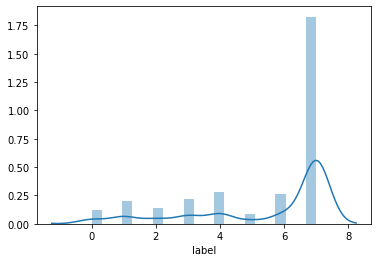

In [17]:
import seaborn as sns
sns.distplot(df['label'])